In [1]:
from diffusiondrawer.dataset import load_dataset, mol_to_data
from diffusiondrawer.model import GATv2Model, LinearDiffuser
from rdkit import Chem
from rdkit.Chem import Draw
import numpy as np
from tqdm import tqdm
import pandas as pd
import torch

In [2]:
def set_conformer(mol, positions):
    conformer = Chem.Conformer(mol.GetNumAtoms())
    for i in range(mol.GetNumAtoms()):
        position = x_[i]
        conformer.SetAtomPosition(i, (position[0].item(), position[1].item(), 0))
    mol.RemoveAllConformers()
    mol.AddConformer(conformer)
    return mol

def get_positions(mol):
    conformer = mol.GetConformer()
    for i in range(mol.GetNumAtoms()):
        position = conformer.GetAtomPosition(i)
        positions.append([position[0], position[1]])
    positions = torch.tensor(positions)
    return positions

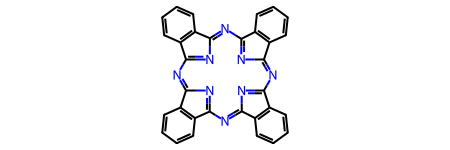

In [13]:
mol = Chem.MolFromMolFile('../data/USPTO_mol_ref/US07314511-20080101-C00002.MOL')
mol

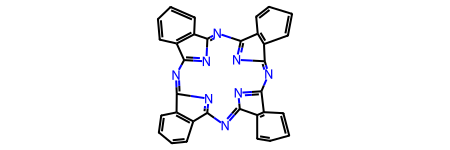

In [14]:
diffuser = LinearDiffuser(T=1000)
positions = []
conformer = mol.GetConformer()
for i in range(mol.GetNumAtoms()):
    position = conformer.GetAtomPosition(i)
    positions.append([position[0], position[1]])
positions = torch.tensor(positions)

epsilon, x_ = diffuser._sample(positions, 10)

mol = set_conformer(mol, x_)
mol

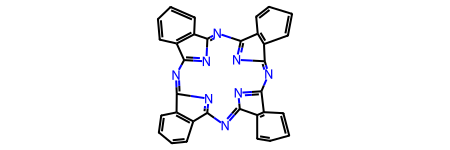

In [16]:
mol_ = Chem.Mol(mol, True)
alpha_bar = diffuser.alpha_bars[10]
new_positions = (positions-torch.sqrt(1-alpha_bar)*epsilon)/(torch.sqrt(alpha_bar))
set_conformer(mol_, new_positions)